<a href="https://colab.research.google.com/github/EstherWhang/jpm_changepoint/blob/main/sinusoidal_easy_med_hard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sinosoidal Changepoint Detection

Analyzing the wavy data provided by the ruptures package.

# Imports

In [ ]:
!pip install ruptures

     |████████████████████████████████| 918 kB 4.3 MB/s 


In [ ]:
import matplotlib.pyplot as plt  # for display purposes
import numpy as np
import ruptures as rpt  # our package

# Ruptures wavy data

piecewise sinusoidal - vary noise and frequency

Rupture package doesn't allow you to change frequency, made my own data generator to test out frequency breka points as well

(<Figure size 720x144 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e7be5fdd0>])

<Figure size 432x288 with 0 Axes>

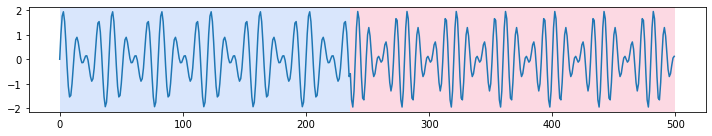

<Figure size 432x288 with 0 Axes>

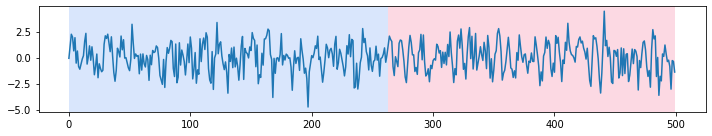

<Figure size 432x288 with 0 Axes>

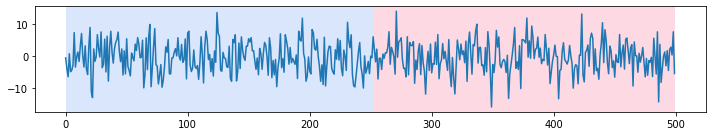

In [ ]:
#wavy data using ruptures 
#only changing noise levels

#easy - no noise
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 1, 0  # number of change points, noise standart deviation
signal1, bkps1 = rpt.pw_wavy(n, n_bkps, noise_std=sigma)
plt.figure()
rpt.display(signal1, bkps1)
#medium - some noise
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 1, 1  # number of change points, noise standart deviation
signal2, bkps2 = rpt.pw_wavy(n, n_bkps, noise_std=sigma)
plt.figure()
rpt.display(signal2, bkps2)
#hard - no noise
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 1, 5  # number of change points, noise standart deviation
signal3, bkps3 = rpt.pw_wavy(n, n_bkps, noise_std=sigma)
plt.figure()
rpt.display(signal3, bkps3)

# Applying Ruptures Changepoint detection 

## Binary Segmentation

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e7b891c10>])

<Figure size 432x288 with 0 Axes>

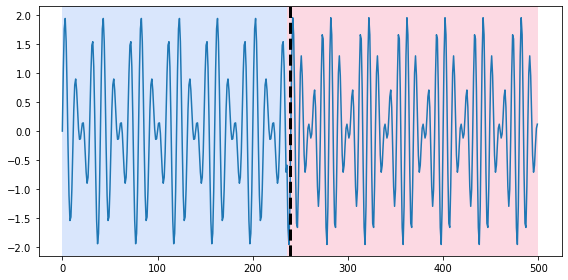

<Figure size 432x288 with 0 Axes>

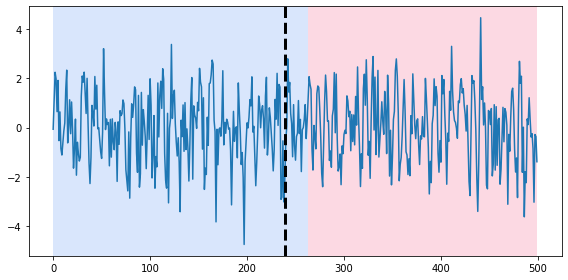

<Figure size 432x288 with 0 Axes>

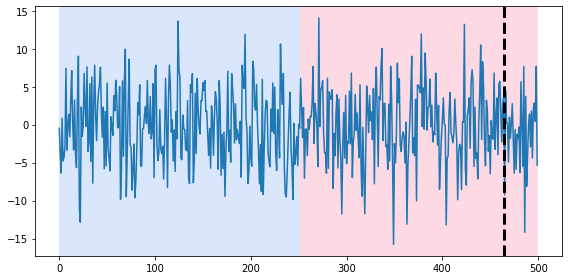

In [ ]:
#Binary segmentation
model = "ar"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal1)
my_bkps = algo.predict(n_bkps=1)
plt.figure()

rpt.show.display(signal1, bkps1, my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal2, bkps2, my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(signal3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal3, bkps3, my_bkps, figsize=(8, 4))

## Bottom-up segmentation

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e79ec1650>])

<Figure size 432x288 with 0 Axes>

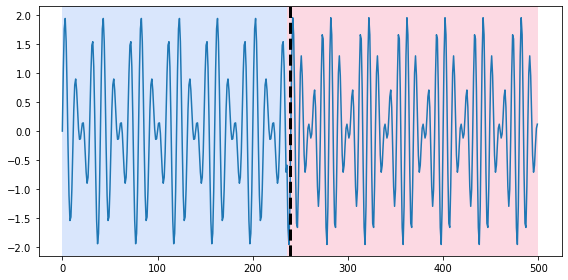

<Figure size 432x288 with 0 Axes>

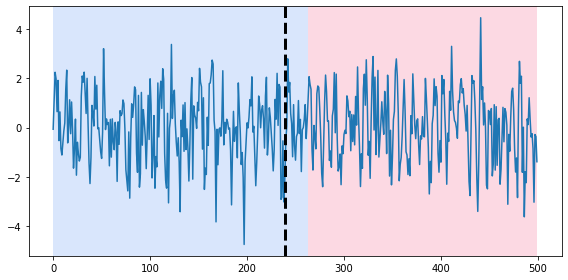

<Figure size 432x288 with 0 Axes>

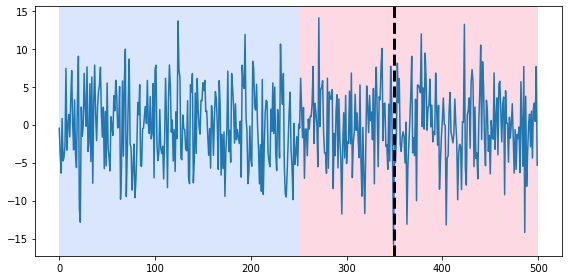

In [ ]:
#Bottom-up segmentation
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal1)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal1, bkps1, my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal2, bkps2, my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(signal3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal3, bkps3, my_bkps, figsize=(8, 4))

## Dynamic Programming

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e7b8e0890>])

<Figure size 432x288 with 0 Axes>

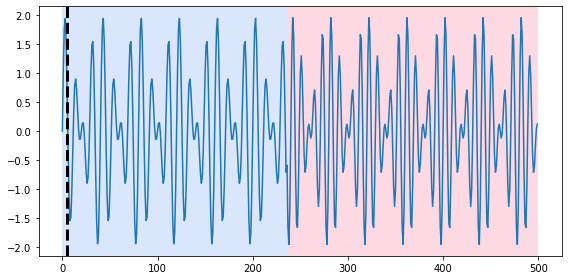

<Figure size 432x288 with 0 Axes>

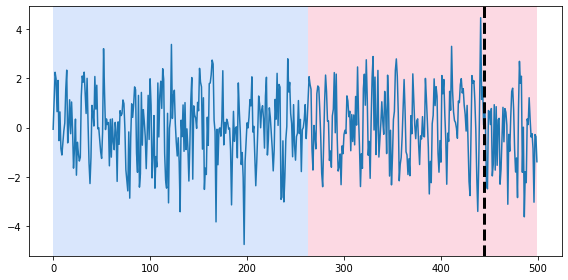

<Figure size 432x288 with 0 Axes>

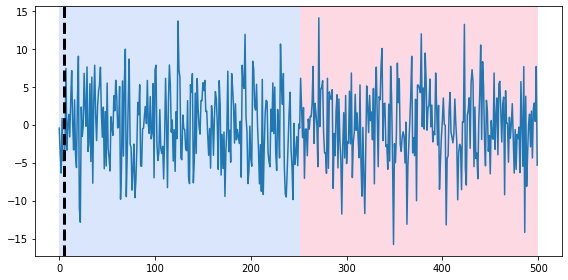

In [ ]:
#Dynamic programming
model = "l2"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(signal1)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal1, bkps1, my_bkps, figsize=(8, 4))

#medium
model = "l2"  # "l2", "rbf"
algo =rpt.Dynp(model=model, min_size=3, jump=5).fit(signal2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal2, bkps2, my_bkps, figsize=(8, 4))

#hard
model = "l2"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(signal3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal3, bkps3, my_bkps, figsize=(8, 4))

## Linearly penalized segmentation

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e83f034d0>])

<Figure size 432x288 with 0 Axes>

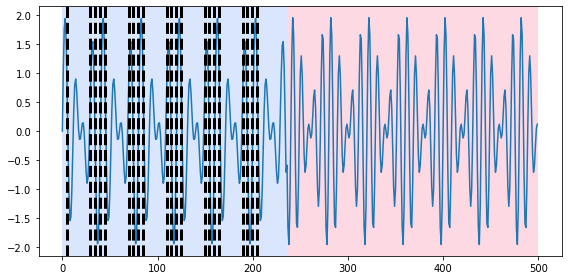

<Figure size 432x288 with 0 Axes>

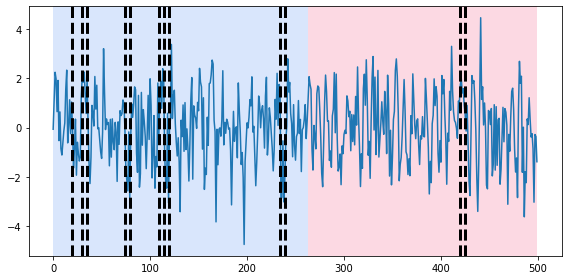

<Figure size 432x288 with 0 Axes>

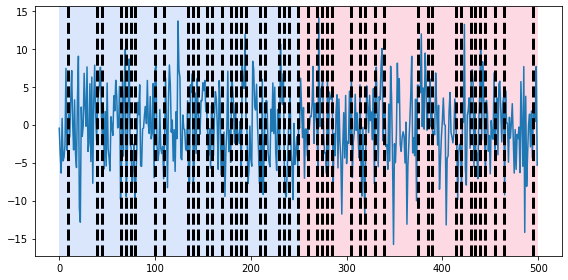

In [ ]:
#Linearly penalized segmentation 
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal1)
my_bkps = algo.predict(pen=3)
plt.figure()
rpt.show.display(signal1, bkps1, my_bkps, figsize=(8, 4))
#medium
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal2)
my_bkps = algo.predict(pen=3)
plt.figure()
rpt.show.display(signal2, bkps2, my_bkps, figsize=(8, 4))

#hard
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(signal3)
my_bkps = algo.predict(pen=3)
plt.figure()
rpt.show.display(signal3, bkps3, my_bkps, figsize=(8, 4))


## Window-based

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e79b950d0>])

<Figure size 432x288 with 0 Axes>

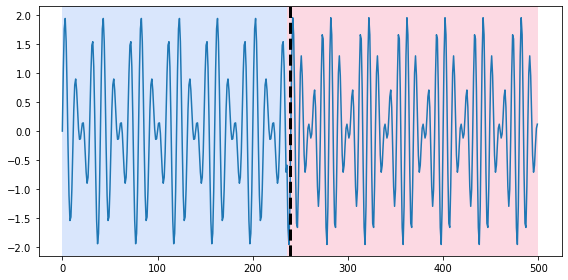

<Figure size 432x288 with 0 Axes>

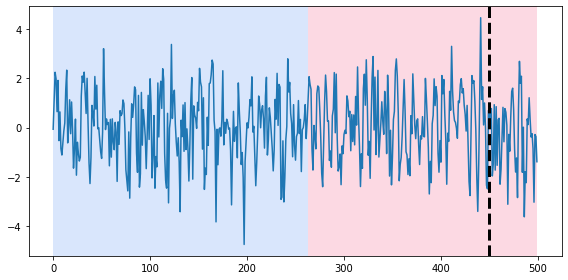

<Figure size 432x288 with 0 Axes>

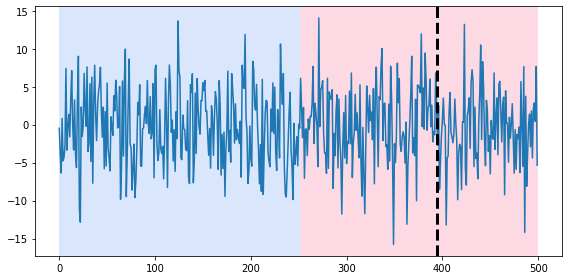

In [ ]:
#Window
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal1)
my_bkps_w1 = algo.predict(n_bkps=1)
# show results
plt.figure()
rpt.show.display(signal1, bkps1, my_bkps_w1, figsize=(8, 4))

#medium
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal2)
my_bkps_w2 = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal2, bkps2, my_bkps_w2, figsize=(8, 4))

#hard
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(signal3)
my_bkps_w3 = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(signal3, bkps3, my_bkps_w3, figsize=(8, 4))


### Metrics Analysis



#### Precision Recall

In [ ]:
from ruptures.metrics import precision_recall


print("Easy metrics")
p, r = precision_recall(bkps1, my_bkps_w1)
print((p, r))

print("Medium metrics")
p, r = precision_recall(bkps2, my_bkps_w2)
print((p, r))

print("Hard metrics")
p, r = precision_recall(bkps3, my_bkps_w3)
print((p, r))

Easy metrics
(1.0, 1.0)
Medium metrics
(0.0, 0.0)
Hard metrics
(0.0, 0.0)


#### Rand index

In [ ]:
from ruptures.metrics import randindex

print("Easy metrics")
print(randindex(bkps1, my_bkps_w1))

print("Medium metrics")
print(randindex(bkps2, my_bkps_w2))

print("Hard metrics")
print(randindex(bkps3, my_bkps_w3))


Easy metrics
0.984128
Medium metrics
0.531752
Hard metrics
0.591592



# Creating custom data generator

Allows you to change the noise and the frequency together

In [ ]:
#changepoint wasn't dramatic enough with rupture package, generated on my own

def sinusodial_changepoint(N, f_section_1, f_section_2, breakN, noise_std):
  x = np.arange(0,N)
  part_1 = np.sin(2*np.pi*f_section_1[0]*x[0:breakN])+np.sin(2*np.pi*f_section_1[1]*x[0:breakN])
  part_2 = np.sin(2*np.pi*f_section_2[0]*x[breakN:N])+np.sin(2*np.pi*f_section_2[1]*x[breakN:N])
  return np.concatenate([part_1,part_2]) + np.random.normal(0, noise_std, size = x.shape)
#fft_signal = fft(piecewise_sinusoidal_sin_1)


Text(0.5, 1.0, 'Frequency: Hard')

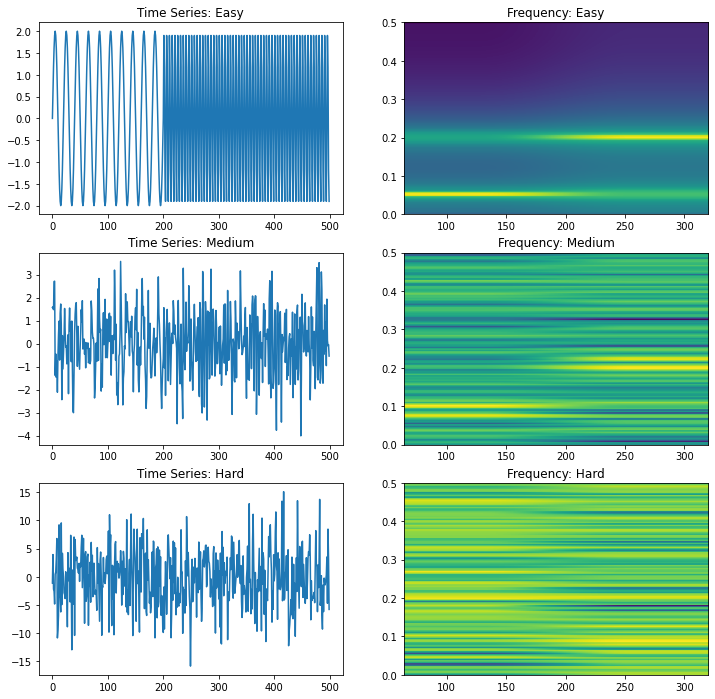

In [ ]:

N=500
breakN = 200

#easy case, clearly distinct in the fourier domain and in the time domain
noise_std = 0
f_section_1 = [0.05, 0.05]
f_section_2 = [0.2, 0.2]
piecewise_sin_1 = sinusodial_changepoint(N, f_section_1, f_section_2, breakN, noise_std)

noise_std = 1
f_section_1 = [0.075, 0.1]
f_section_2 =  [0.2, 0.225]
piecewise_sin_2 = sinusodial_changepoint(N, f_section_1, f_section_2, breakN, noise_std)
#fft_signal = fft(piecewise_sinusoidal_sin_1)

noise_std = 5
f_section_1 = [0.075, 0.1]
f_section_2 = [0.1, 0.125]
piecewise_sin_3 = sinusodial_changepoint(N, f_section_1, f_section_2, breakN, noise_std)

plt.figure(figsize=(12,12)) 

#no noise, only one freq each section, different frequency after break
plt.subplot(3,2,1)
plt.plot(piecewise_sin_1)
plt.title("Time Series: Easy")
plt.subplot(3,2,2)
plt.specgram(piecewise_sin_1, Fs=1)
plt.title("Frequency: Easy")

#some noise, frequency notably different after break, different freq within section
plt.subplot(3,2,3)
plt.plot(piecewise_sin_2)
plt.title("Time Series: Medium")
plt.subplot(3,2,4)
plt.specgram(piecewise_sin_2, Fs=1)
plt.title("Frequency: Medium")

#hard due to increased noise and shared frequency
plt.subplot(3,2,5)
plt.plot(piecewise_sin_3)
plt.title("Time Series: Hard")
plt.subplot(3,2,6)
plt.specgram(piecewise_sin_3, Fs=1)
plt.title("Frequency: Hard")



## Applying rupture detectors

-mixed success with easy/medium, almost no success with hard



## Binary Segmentation

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e84195d10>])

<Figure size 432x288 with 0 Axes>

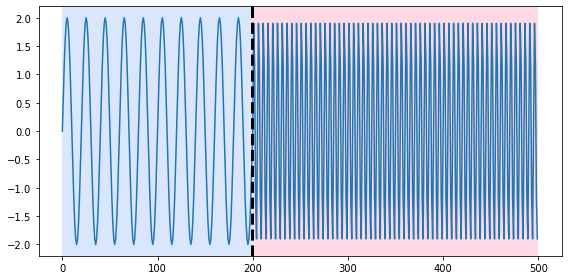

<Figure size 432x288 with 0 Axes>

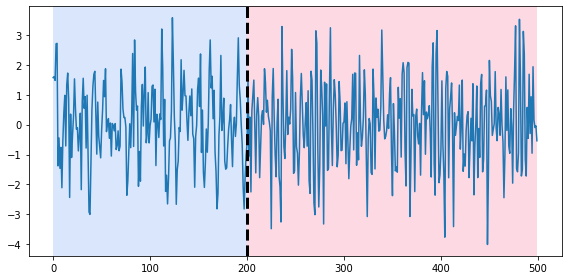

<Figure size 432x288 with 0 Axes>

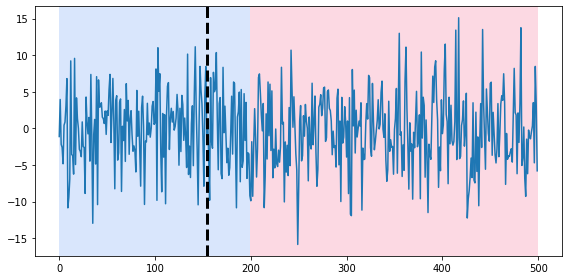

In [ ]:
#Binary segmentation
model = "ar"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(piecewise_sin_1)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_1, [breakN, N], my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(piecewise_sin_2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_2, [breakN, N], my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(piecewise_sin_3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_3, [breakN, N], my_bkps, figsize=(8, 4))

## Bottom-up segmentation

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e7b8729d0>])

<Figure size 432x288 with 0 Axes>

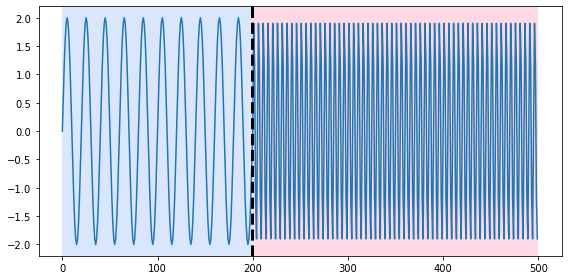

<Figure size 432x288 with 0 Axes>

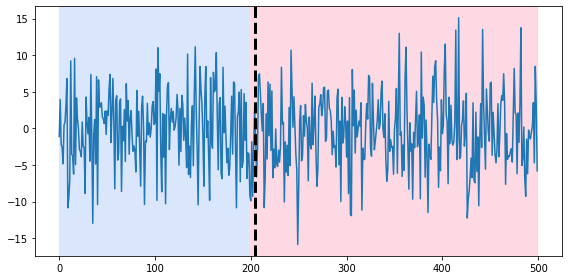

<Figure size 432x288 with 0 Axes>

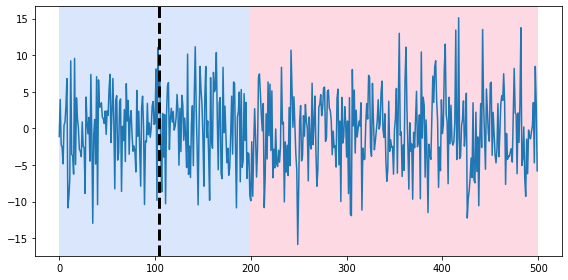

In [ ]:
#Bottom-up segmentation
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(piecewise_sin_1)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_1, [breakN, N], my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(piecewise_sin_2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_3, [breakN, N], my_bkps, figsize=(8, 4))

model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.BottomUp(model=model).fit(piecewise_sin_3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_3, [breakN, N], my_bkps, figsize=(8, 4))


## Dynamic Programming

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e79c2d3d0>])

<Figure size 432x288 with 0 Axes>

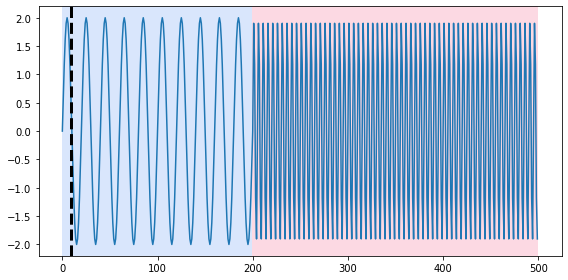

<Figure size 432x288 with 0 Axes>

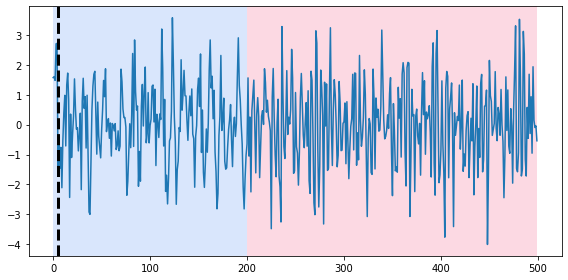

<Figure size 432x288 with 0 Axes>

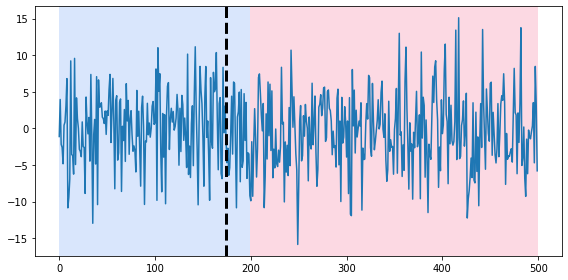

In [ ]:
#Dynamic programming
model = "l2"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(piecewise_sin_1)
my_bkps = algo.predict(n_bkps=1)
# show results
plt.figure()
rpt.show.display(piecewise_sin_1, [breakN, N], my_bkps, figsize=(8, 4))

#medium
model = "l2"  # "l2", "rbf"
algo =rpt.Dynp(model=model, min_size=3, jump=5).fit(piecewise_sin_2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_2, [breakN, N], my_bkps, figsize=(8, 4))

#hard
model = "l2"  # "l2", "rbf"
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(piecewise_sin_3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_3, [breakN, N], my_bkps, figsize=(8, 4))

## Linearly penalized segmentation

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e7967c2d0>])

<Figure size 432x288 with 0 Axes>

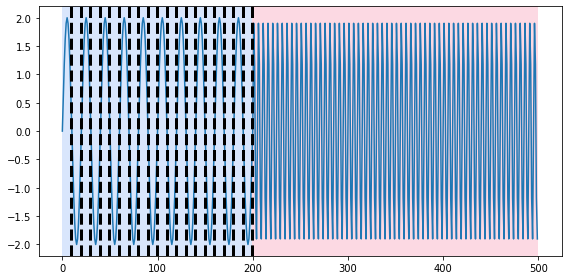

<Figure size 432x288 with 0 Axes>

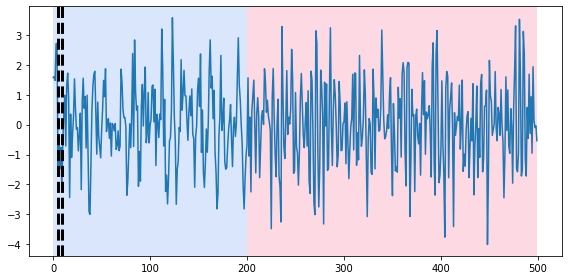

<Figure size 432x288 with 0 Axes>

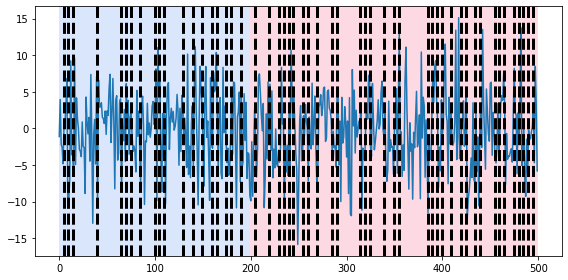

In [ ]:
#Linearly penalized segmentation 
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(piecewise_sin_1)
my_bkps = algo.predict(pen=3)
# show results
plt.figure()
rpt.show.display(piecewise_sin_1, [breakN, N], my_bkps, figsize=(8, 4))

#medium
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(piecewise_sin_2)
my_bkps = algo.predict(pen=3)
plt.figure()
rpt.show.display(piecewise_sin_2, [breakN, N], my_bkps, figsize=(8, 4))

#hard
model = "l1"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=5).fit(piecewise_sin_3)
my_bkps = algo.predict(pen=3)
plt.figure()
rpt.show.display(piecewise_sin_3, [breakN, N], my_bkps, figsize=(8, 4))


## Window-based

(<Figure size 576x288 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f0e79439750>])

<Figure size 432x288 with 0 Axes>

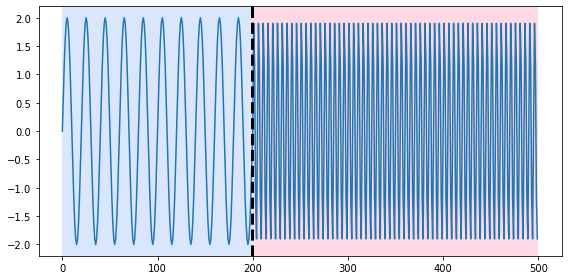

<Figure size 432x288 with 0 Axes>

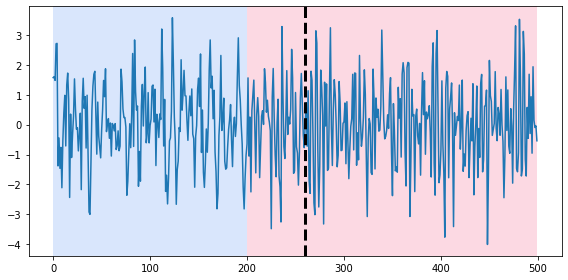

<Figure size 432x288 with 0 Axes>

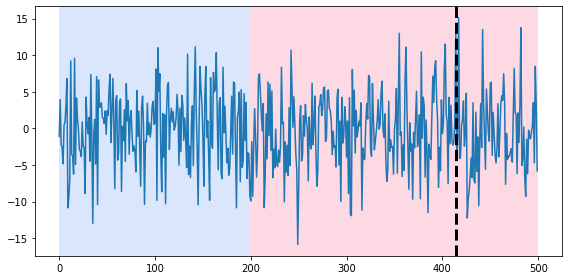

In [ ]:
#Window
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(piecewise_sin_1)
my_bkps = algo.predict(n_bkps=1)
# show results
plt.figure()
rpt.show.display(piecewise_sin_1, [breakN, N], my_bkps, figsize=(8, 4))

#medium
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(piecewise_sin_2)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_2, [breakN, N], my_bkps, figsize=(8, 4))

#hard
model = "ar"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(piecewise_sin_3)
my_bkps = algo.predict(n_bkps=1)
plt.figure()
rpt.show.display(piecewise_sin_3, [breakN, N], my_bkps, figsize=(8, 4))

